## Dependencies

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import os                       # for working with files

## Reading Data

In [3]:
import os
from PIL import Image
import numpy as np

def load_dataset(directory):
    images = []
    labels = []

    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith(('.JPG', '.jpg', '.jpeg', '.png')):  # Assuming images are in common formats
                img_path = os.path.join(root, filename)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((150, 150))  # Resize the image to a consistent size
                img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
                images.append(img_array)
                
                # Extract the class label from the subdirectory name
                class_name = os.path.basename(root)
                labels.append(class_name)

    return np.array(images), np.array(labels)

# Example usage
dataset_directory = './Dataset for Crop Pest and Disease Detection/CCMT Dataset-Augmented/'
images, labels = load_dataset(dataset_directory)

# Now 'images' is a NumPy array containing your image data, and 'labels' contains corresponding labels.

KeyboardInterrupt: 

#### Read images data

In [4]:
data_dir= "./PlantVillage-Dataset/data_distribution_for_SVM"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)
diseases

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

## Predictive Model for Crop Pest and Disease Detection    

In [5]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [8]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

IndexError: list index out of range

In [9]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")


Unique Plants are: 
['0']


In [10]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 1


In [11]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 0


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [12]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class 

,no. of images
0,111
1,114
10,212
11,187
12,233
13,159
14,67
15,847
16,386
17,74


Text(0.5, 1.0, 'Images per each class of plant disease')

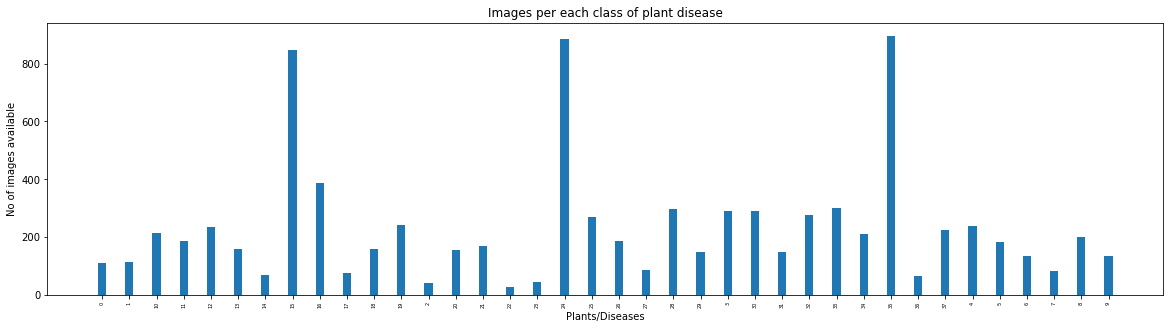

In [13]:
import matplotlib.pyplot as plt
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

We can see that the dataset is almost balanced for all classes, so we are good to go forward

#### Images available for training

In [14]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 8751 images for training


In [15]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

NameError: name 'ImageFolder' is not defined